# 크롤링이란?

* 웹페이지에서 내가 필요로하는 데이터를 추출해 내는 것을 크롤링 혹은 스크래핑 이라고 합니다.
* 크롤링을 하는 프로그램은 크롤러라고 부릅니다.
* 네이버, 구글 등의 포털 사이트에서도 이와 비슷한 웹문서 수집 봇을 운영하고 데이터 수집의 핵심 기술중에 하나 입니다.
* 인공지능의 학습 데이터를 수집하거나 빅데이터를 분석하기전 빅데이터를 수집하는 등의 역할에서도 크롤링은 상당히 중요한 분야 입니다.

## 크롤링을 위해 필요한 사전 지식

* HTML 을 잘 알면 좋겠지만 잘 알지는 못하더라도 최소 크롤링에 필요한 정도의 사전 지식이 필요합니다.
* 웹페이지가 어떻게 구동되는지 웹로직을 어느정도는 이해하는게 좋습니다.
* 내가 무엇을 위해 무어을 수집해야할지 목표가 정해져야 합니다.
* 크롤러를 만드는 프로그래밍 기술이 필요합니다.

## 크롤링의 방법

* 웹서비스를 제공하는 곳에서 개발자들을 위해 제공하는 API 등을 활용하는 방법
* 웹페이지를 문자열 데이터로 수집하여 문자열 데이터 내에서 원하는 데이터를 파싱하여 추출하는 방법 (CSS Selector 활용)
* 웹페이지를 실제 브라우징 환경과 똑같이 브라우저를 통해 렌더링 된 후에 원하는 데이터를 추출하는 방법 (XPATH 등 활용)

## 기본적인 HTML

* HTML 태그는 기본적으로 **<괄호></괄호>** 형태로 사용됩니다.
* **&#60;a href="주소">내용&#60;/a>** 태그는 클릭시 링크되는 링크 태그 
* **&#60;div>내용&#60;/div>** 태그는 HTML에 레이아웃, 영역을 잡는 태그로 그 자체로는 특별한 기능이 없습니다.
* **&#60;img src="이미지주소">&#60;/img>** 태그는 이미지 태그
* 여기서 a, div, img 를 **태그**라고 하고 태그 안에 href, src 등을 **속성**이라고 합니다.
* 크롤링에서는 태그의 속성중에 class="클래스명" 혹은 id="아이디" name="이름" 등 태그의 유니크한 속성들을 많이 사용합니다.

In [1]:
%%html

<html>
<body>
    <div>
        <span class="info">HTML 태그 예제</span>
    </div>
    <div>
        <a href="http://www.naver.com">네이버링크</a>
        <a href="http://www.google.com">구글링크</a>
    </div>
</body>

## CSS 선택자(Selector) 이해

* HTML 규칙을 갖고 있는 많은 문자열 속에서 원하는 데이터를 추출하기 위해선 원하는 데이터에 접근하는 방법을 알아야 합니다.
* CSS 선택자는 원래 프론트개발자가 HTML 페이지를 작성할때 CSS 스타일을 일괄적으로 적용하기 위한 기술인데 크롤링에서 이를 역으로 이용하여 특정 요소에 접근하는 방식으로 사용됩니다.


# 웹브라우저의 개발자 도구 이해하기

* 웹 개발 및 디버깅을 위해 브라우저에 내장된 디버깅 기능
* 크롬, 파이어폭스, 엣지 모두 단축키 F12 키로 동작
* 브라우저마다 약간의 차이는 있겠지만 모두 비슷한 환경과 기능으로 동작함
* 크롤링을 위해 모든 기능을 알 필요는 없고 필요한 기능만 활용하는것을 목표로 함

### 페이지에서 요소 선택하기

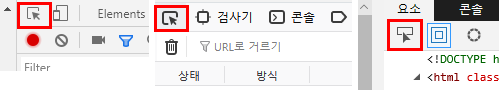

크롤링을 위해 가장 많이 사용하고 가장 중요한 개발자도구 기능이 페이지에서 요소를 선택하는 기능입니다. 위 이미지에서 빨간박스안의 아이콘이 좌측부터 크롬, 파이어폭스, 엣지의 개발자모드에서 요소 고르기 버튼 입니다. 크롤링에 필요한 요소가 어떤 요소이고 어떤 요소들에 둘러쌓여있는지 어떻게 접근해야 할지를 확인하고 계획하는데 필요한 기능입니다.

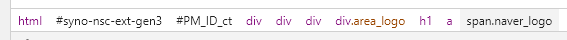


요소선택 버튼을 클릭하고 분석해야할 요소를 좌측 HTML 페이지에서 선택하면 자동으로 Elements 탭으로 전환되며 해당 요소의 DOM tree 형태를 확인 할 수 있습니다.
> Document Object Model 은 웹 브라우저의 문서를 이루고 있는 객체 모델로서 쉽게 HTML 페이지를 인식하는 방식을 의미하기도 합니다.

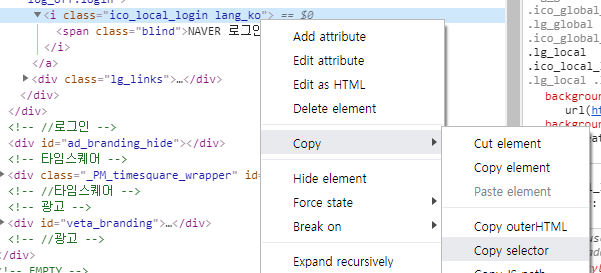

* 개발자도구에서 특정 요소를 선택하면 해당 요소의 CSS Selector를 복사하여 사용할 수도 있습니다.

### 개발자도구의 네트워크 탭

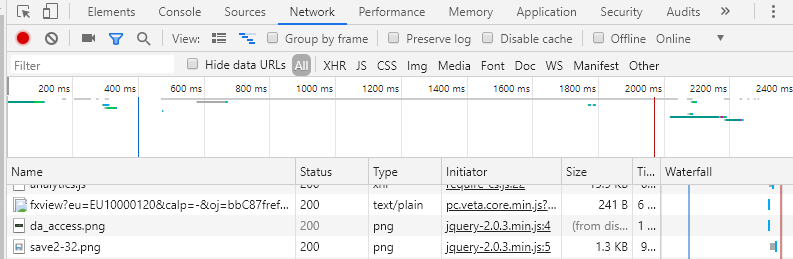

* 하나의 웹페이지는 수많은 이미지와 수많은 자바스크립트 파일이 사용되며 페이지 하나에서 수많은 다른 페이지를 접속할 수도 있습니다. 개발자도구의 네트워크탭은 이런 모든 내용을 확인 할 수 있는 기능입니다.
* Preserve log 옵션은 페이지로드 됨과 동시 다른페이지로 이동(Redirect)이 되면 네트워크탭의 내용이 초기화 되는데 이를 방지합니다.
* Disable cache 는 페이지가 로드될때 기존에 로드되어 캐싱된 정보가 있다면 그걸 사용하게 되는데 이를 무시하고 서버에서 항상 새로운 데이터로 갱신을 하게 하는 기능입니다.
* 카메라아이콘은 해당 페이지가 로드된 시작부터 완료될때까지의 변화를 시간단위로 쪼개 기록하며 저장하고 각 시간별로 확인할 수 있는 기능을 제공합니다. 분석이 많이 필요한 특정 사이트나 페이지에서 사용됩니다.